In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your data (make sure your file path is correct)
data = pd.read_csv('tv_shows.csv')

# Clean the data by dropping rows where IMDb or Rotten Tomatoes ratings are missing
data_cleaned = data.dropna(subset=['IMDb', 'Rotten Tomatoes']).copy()

# Convert IMDb and Rotten Tomatoes to numerical values using .loc[] to avoid the warning
data_cleaned.loc[:, 'IMDb'] = data_cleaned['IMDb'].str.replace('/10', '').astype(float)
data_cleaned.loc[:, 'Rotten Tomatoes'] = data_cleaned['Rotten Tomatoes'].str.replace('/100', '').astype(float)

# Select features (Year, streaming platforms) and target variables (IMDb, Rotten Tomatoes)
features = data_cleaned[['Year', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]
target_imdb = data_cleaned['IMDb']
target_rt = data_cleaned['Rotten Tomatoes']

# Split the data into training and testing sets (for IMDb and Rotten Tomatoes)
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(features, target_imdb, test_size=0.2, random_state=42)
X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(features, target_rt, test_size=0.2, random_state=42)

# Initialize and train the model for IMDb ratings
model_imdb = LinearRegression()
model_imdb.fit(X_train_imdb, y_train_imdb)

# Initialize and train the model for Rotten Tomatoes scores
model_rt = LinearRegression()
model_rt.fit(X_train_rt, y_train_rt)

# Make predictions for IMDb and Rotten Tomatoes
y_pred_imdb = model_imdb.predict(X_test_imdb)
y_pred_rt = model_rt.predict(X_test_rt)

# Evaluate the models (Mean Squared Error and R-squared score)
mse_imdb = mean_squared_error(y_test_imdb, y_pred_imdb)
r2_imdb = r2_score(y_test_imdb, y_pred_imdb)

mse_rt = mean_squared_error(y_test_rt, y_pred_rt)
r2_rt = r2_score(y_test_rt, y_pred_rt)

# Print the evaluation results
print(f"IMDb Prediction - MSE: {mse_imdb}, R-squared: {r2_imdb}")
print(f"Rotten Tomatoes Prediction - MSE: {mse_rt}, R-squared: {r2_rt}")


IMDb Prediction - MSE: 1.2482307928464216, R-squared: 0.009170654328182204
Rotten Tomatoes Prediction - MSE: 195.01563738257846, R-squared: 0.0665045140123659


In [3]:
# Import necessary libraries for advanced models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the advanced models
rf_model_imdb = RandomForestRegressor(random_state=42)
gb_model_imdb = GradientBoostingRegressor(random_state=42)

rf_model_rt = RandomForestRegressor(random_state=42)
gb_model_rt = GradientBoostingRegressor(random_state=42)

# Train the Random Forest model for IMDb and Rotten Tomatoes
rf_model_imdb.fit(X_train_imdb, y_train_imdb)
rf_model_rt.fit(X_train_rt, y_train_rt)

# Train the Gradient Boosting model for IMDb and Rotten Tomatoes
gb_model_imdb.fit(X_train_imdb, y_train_imdb)
gb_model_rt.fit(X_train_rt, y_train_rt)

# Make predictions for both models (Random Forest and Gradient Boosting)
rf_pred_imdb = rf_model_imdb.predict(X_test_imdb)
gb_pred_imdb = gb_model_imdb.predict(X_test_imdb)

rf_pred_rt = rf_model_rt.predict(X_test_rt)
gb_pred_rt = gb_model_rt.predict(X_test_rt)

# Evaluate the Random Forest models
mse_rf_imdb = mean_squared_error(y_test_imdb, rf_pred_imdb)
r2_rf_imdb = r2_score(y_test_imdb, rf_pred_imdb)

mse_rf_rt = mean_squared_error(y_test_rt, rf_pred_rt)
r2_rf_rt = r2_score(y_test_rt, rf_pred_rt)

# Evaluate the Gradient Boosting models
mse_gb_imdb = mean_squared_error(y_test_imdb, gb_pred_imdb)
r2_gb_imdb = r2_score(y_test_imdb, gb_pred_imdb)

mse_gb_rt = mean_squared_error(y_test_rt, gb_pred_rt)
r2_gb_rt = r2_score(y_test_rt, gb_pred_rt)

# Print the evaluation results for Random Forest
print(f"Random Forest IMDb - MSE: {mse_rf_imdb}, R-squared: {r2_rf_imdb}")
print(f"Random Forest Rotten Tomatoes - MSE: {mse_rf_rt}, R-squared: {r2_rf_rt}")

# Print the evaluation results for Gradient Boosting
print(f"Gradient Boosting IMDb - MSE: {mse_gb_imdb}, R-squared: {r2_gb_imdb}")
print(f"Gradient Boosting Rotten Tomatoes - MSE: {mse_gb_rt}, R-squared: {r2_gb_rt}")


Random Forest IMDb - MSE: 1.325990436923905, R-squared: -0.05255393835332978
Random Forest Rotten Tomatoes - MSE: 198.72606274203156, R-squared: 0.048743552016541236
Gradient Boosting IMDb - MSE: 1.2386187907816388, R-squared: 0.016800536374856567
Gradient Boosting Rotten Tomatoes - MSE: 190.87677806421019, R-squared: 0.08631629189177303


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Load your dataset
# df = pd.read_csv('your_dataset.csv')
# Replace with your actual dataset loading method

# Sample data for demonstration purposes
# Replace this with your actual features and target
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, np.nan, 6],
    'feature2': ['A', 'B', 'A', 'B', 'A', 'B'],
})
y = pd.Series([1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['feature1']
categorical_features = ['feature2']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning for Random Forest with reduced folds
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid_rf, cv=2, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Evaluate the best model
rf_best_model = grid_rf.best_estimator_
rf_pred = rf_best_model.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")

# Create a pipeline for Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning for Gradient Boosting with reduced folds
param_grid_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(estimator=gb_pipeline, param_grid=param_grid_gb, cv=2, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)

# Best parameters
print("Best parameters for Gradient Boosting:", grid_gb.best_params_)

# Evaluate the best model
gb_best_model = grid_gb.best_estimator_
gb_pred = gb_best_model.predict(X_test)
mse_gb = mean_squared_error(y_test, gb_pred)
r2_gb = r2_score(y_test, gb_pred)
print(f"Gradient Boosting - MSE: {mse_gb}, R-squared: {r2_gb}")

# Cross-validation scores for Random Forest
cv_scores_rf = cross_val_score(rf_best_model, X_train, y_train, cv=2, scoring='neg_mean_squared_error')
print("Random Forest Cross-Validation MSE:", -cv_scores_rf.mean())

# Cross-validation scores for Gradient Boosting
cv_scores_gb = cross_val_score(gb_best_model, X_train, y_train, cv=2, scoring='neg_mean_squared_error')
print("Gradient Boosting Cross-Validation MSE:", -cv_scores_gb.mean())


Best parameters for Random Forest (Randomized Search): {'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__max_features': None, 'model__max_depth': 10}
Random Forest - MSE: 9.320136111111111, R-squared: -36.280544444444445
XGBoost - MSE: 2.503305694795017, R-squared: -9.013222779180069
Random Forest Cross-Validation MSE: 1.2516805555555557
XGBoost Cross-Validation MSE: 3.246733840494244


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# Sample data for demonstration purposes
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, np.nan, 6],
    'feature2': ['A', 'B', 'A', 'B', 'A', 'B'],
})
y = pd.Series([1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

# Fill missing values with mean
X['feature1'] = X['feature1'].fillna(X['feature1'].mean())

# Feature Engineering
X['feature1_squared'] = X['feature1'] ** 2
X['feature1'] = np.log1p(X['feature1'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['feature1', 'feature1_squared']
categorical_features = ['feature2']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning for Random Forest with RandomizedSearchCV
param_dist_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

random_rf = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_dist_rf, n_iter=50, cv=2, scoring='neg_mean_squared_error', random_state=42)
random_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest (Randomized Search):", random_rf.best_params_)

# Evaluate the best model
rf_best_model = random_rf.best_estimator_
rf_pred = rf_best_model.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")

# Create and fit XGBoost model
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_processed, y_train)

# Make predictions and evaluate
xgb_pred = xgb_model.predict(X_test_processed)
mse_xgb = mean_squared_error(y_test, xgb_pred)
r2_xgb = r2_score(y_test, xgb_pred)
print(f"XGBoost - MSE: {mse_xgb}, R-squared: {r2_xgb}")

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_best_model, X_train, y_train, cv=2, scoring='neg_mean_squared_error')
print("Random Forest Cross-Validation MSE:", -cv_scores_rf.mean())

# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X_train_processed, y_train, cv=2, scoring='neg_mean_squared_error')
print("XGBoost Cross-Validation MSE:", -cv_scores_xgb.mean())


Best parameters for Random Forest (Randomized Search): {'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__max_features': None, 'model__max_depth': 10}
Random Forest - MSE: 9.320136111111111, R-squared: -36.280544444444445
XGBoost - MSE: 2.503305694795017, R-squared: -9.013222779180069
Random Forest Cross-Validation MSE: 1.2516805555555557
XGBoost Cross-Validation MSE: 3.246733840494244


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample data (replace this with your actual dataset)
data = {
    'feature1': [1, 2, 3, 4, np.nan, 6],
    'feature2': ['A', 'B', 'A', 'B', 'A', 'B'],
    'target': [10, 15, 10, 20, 25, 30]
}
df = pd.DataFrame(data)

# Define features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numeric and categorical features
numeric_features = ['feature1']
categorical_features = ['feature2']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['sqrt', 'log2']
}

# Use Leave-One-Out Cross-Validation for Random Forest
loo = LeaveOneOut()
grid_rf = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid_rf, cv=loo, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

# Evaluate the best Random Forest model
rf_best_model = grid_rf.best_estimator_
rf_pred = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Random Forest - MSE:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

# Create a pipeline for XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 10],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

# Use Leave-One-Out Cross-Validation for XGBoost
grid_xgb = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid_xgb, cv=loo, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model
xgb_best_model = grid_xgb.best_estimator_
xgb_pred = xgb_best_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("XGBoost - MSE:", xgb_mse)
print("XGBoost - R-squared:", xgb_r2)


c:\Users\albin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 100}
Random Forest - MSE: 21.53125
Random Forest - R-squared: -2.445
Best parameters for XGBoost: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200}
XGBoost - MSE: 8.901257467522555
XGBoost - R-squared: -0.42420125007629395


feature1    1
feature2    0
target      0
dtype: int64
feature1    float64
feature2     object
target        int64
dtype: object


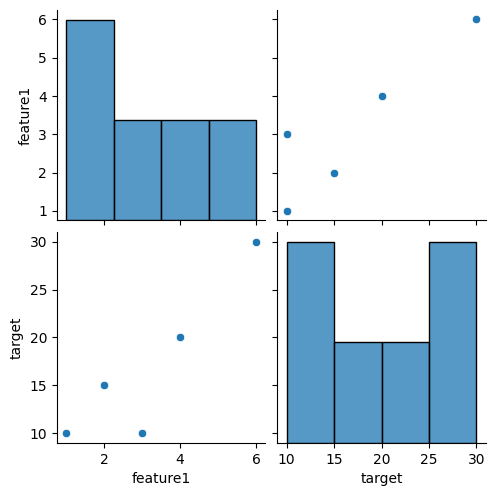

In [15]:
# Check for missing values
print(df.isnull().sum())

# Check the data types of your features
print(df.dtypes)

# Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('TV_SHOWS.CSV')

# Clean the data
df['IMDb'] = df['IMDb'].str.extract(r'(\d+\.\d+)').astype(float)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.extract(r'(\d+)').astype(float)

# Handle missing values
df.fillna(0, inplace=True)

# Select features and target variable
features = ['Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']
target = 'IMDb'

# Convert categorical 'Age' to numerical
df = pd.get_dummies(df, columns=['Age'], drop_first=True)

# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example prediction
example_show = pd.DataFrame({
    'Year': [2021],
    'Rotten Tomatoes': [85],
    'Netflix': [1],
    'Hulu': [0],
    'Prime Video': [0],
    'Disney+': [0],
    'Age_16+': [0],
    'Age_18+': [1],
    'Age_7+': [0],
    'Age_all': [0]
})
predicted_imdb = model.predict(example_show)
print(f'Predicted IMDb Rating: {predicted_imdb[0]}')

KeyError: "['Age'] not in index"

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('TV_SHOWS.CSV')

# Clean the data
df['IMDb'] = df['IMDb'].str.extract(r'(\d+\.\d+)').astype(float)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.extract(r'(\d+)').astype(float)

# Handle missing values
df.fillna(0, inplace=True)

# Convert categorical 'Age' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Age'], drop_first=True)

# Update the features list to include the new one-hot encoded columns
features = ['Year', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'] + [col for col in df.columns if col.startswith('Age_')]
target = 'IMDb'

# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example prediction
example_show = pd.DataFrame({
    'Year': [2021],
    'Rotten Tomatoes': [85],
    'Netflix': [1],
    'Hulu': [0],
    'Prime Video': [0],
    'Disney+': [0],
    'Age_16+': [0],
    'Age_18+': [1],
    'Age_7+': [0],
    'Age_all': [0],
    'Age_13+': [0]  # Include all age categories used during training
})

# Ensure the columns are in the same order as the training data
example_show = example_show[features]

predicted_imdb = model.predict(example_show)
print(f'Predicted IMDb Rating: {predicted_imdb[0]}')

Mean Squared Error: 2.219141184393272
Predicted IMDb Rating: 7.791666666666665


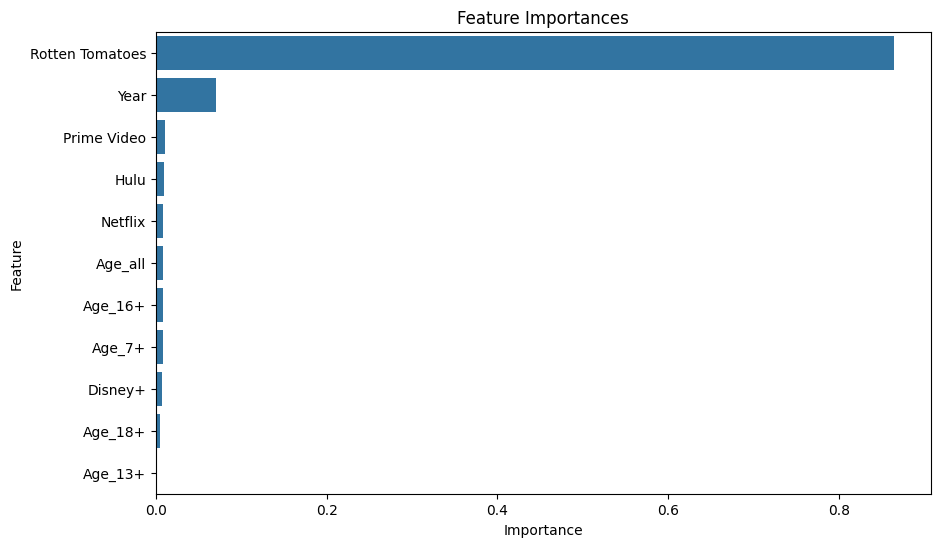

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = features

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

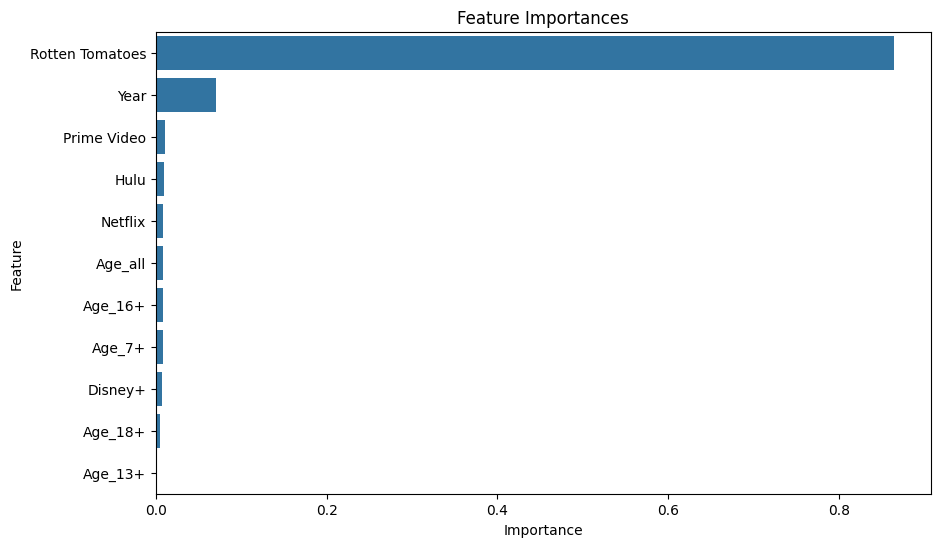

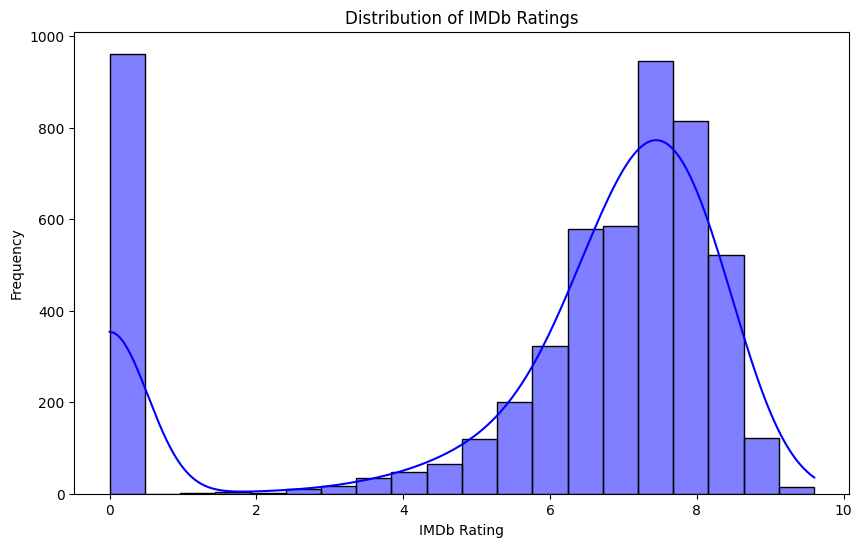

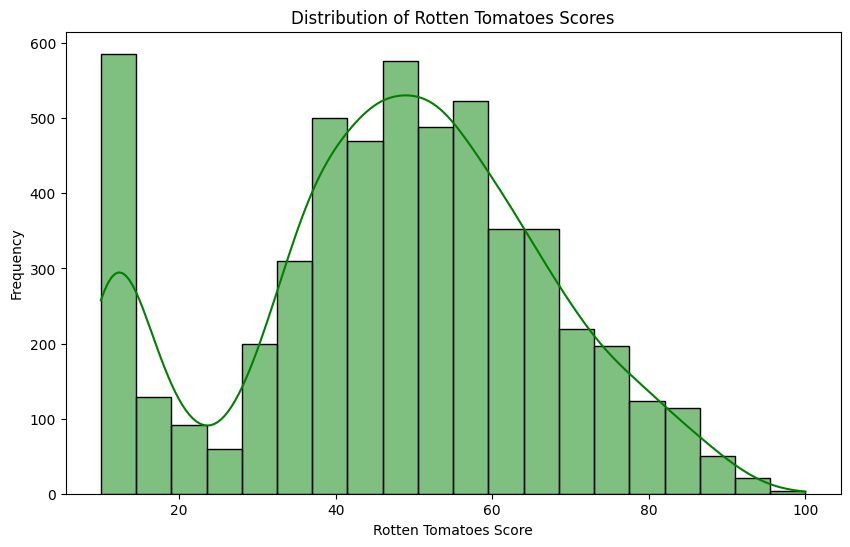

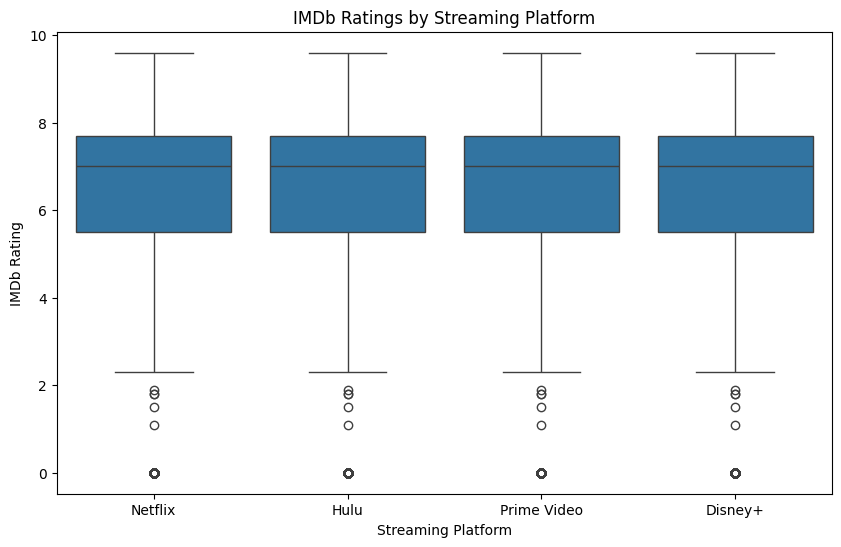

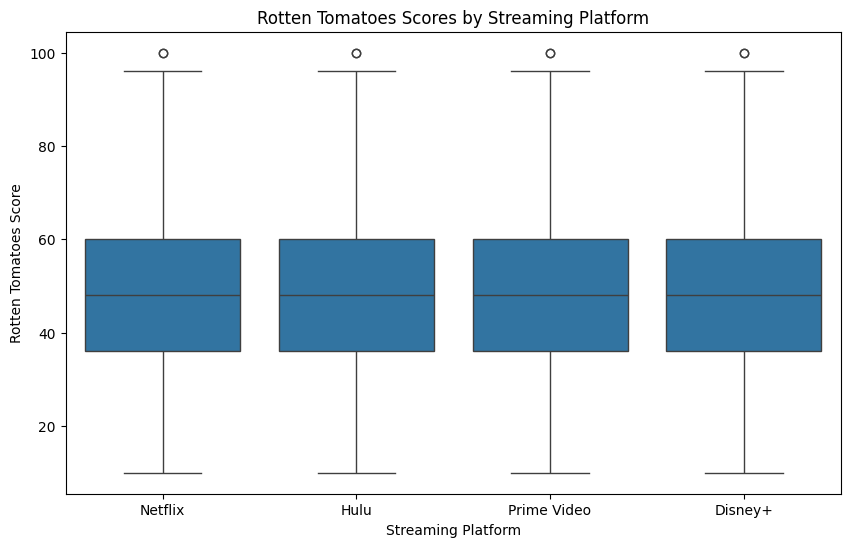

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = features

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Distribution of IMDb Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of Rotten Tomatoes Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Rotten Tomatoes'], bins=20, kde=True, color='green')
plt.title('Distribution of Rotten Tomatoes Scores')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Frequency')
plt.show()

# Box Plot of IMDb Ratings by Streaming Platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='StreamingOn', y='IMDb', data=df.melt(id_vars=['Title', 'IMDb'], value_vars=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], var_name='StreamingOn', value_name='Available'))
plt.title('IMDb Ratings by Streaming Platform')
plt.xlabel('Streaming Platform')
plt.ylabel('IMDb Rating')
plt.show()

# Box Plot of Rotten Tomatoes Scores by Streaming Platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='StreamingOn', y='Rotten Tomatoes', data=df.melt(id_vars=['Title', 'Rotten Tomatoes'], value_vars=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], var_name='StreamingOn', value_name='Available'))
plt.title('Rotten Tomatoes Scores by Streaming Platform')
plt.xlabel('Streaming Platform')
plt.ylabel('Rotten Tomatoes Score')
plt.show()